# Projeto BERT para Classificação de Procedimentos Cirúrgicos

## Descrição do Projeto

Este projeto utiliza o modelo **BERT (Bidirectional Encoder Representations from Transformers)** para classificar descrições de procedimentos cirúrgicos de acordo com códigos **TUSS (Terminologia Unificada da Saúde Suplementar)**, aplicando técnicas de **Natural Language Processing (NLP)** e **Deep Learning**. A classificação correta dessas descrições é essencial para a categorização precisa de dados médicos, contribuindo para a melhoria da gestão hospitalar e da saúde suplementar.

O modelo foi treinado com um conjunto de dados contendo descrições detalhadas de procedimentos médicos e seus respectivos códigos TUSS. O objetivo do projeto é proporcionar uma forma automatizada de associar as descrições de procedimentos com os códigos corretos, aumentando a eficiência e a precisão desse processo em sistemas de saúde.

### Contexto
Na área da saúde suplementar, a classificação correta de procedimentos médicos é essencial para padronizar informações e facilitar a comunicação entre profissionais, pacientes e instituições. O modelo BERT, com sua arquitetura baseada em atenção, é ideal para capturar nuances linguísticas, especialmente em textos descritivos e tecnicamente ricos, como os encontrados em relatórios médicos.

### Objetivos
- Realizar o **fine-tuning** do BERT para classificar descrições textuais em códigos TUSS.
- Avaliar o desempenho do modelo utilizando métricas como **F1-score**, **acurácia**, **precisão** e **recall**.
- Desenvolver um pipeline eficiente que inclua o pré-processamento, treinamento e avaliação do modelo.

## Principais Componentes do Projeto
1. **Pré-processamento dos Dados**:
   - Normalização do texto para remoção de ruídos, stopwords e caracteres especiais.
   - Tokenização utilizando o tokenizer do modelo BERT.

2. **Treinamento do Modelo**:
   - Implementação do modelo BERT com camadas de classificação ajustadas para o problema.
   - Utilização de técnicas de regularização, como `Dropout`, e callbacks para otimização do treinamento.

3. **Avaliação e Visualização**:
   - Geração de gráficos de perda, precisão, recall e F1 durante o treinamento.
   - Análise de matrizes de confusão para verificar o desempenho em diferentes classes.

## Ferramentas e Tecnologias
- **Linguagens**: Python.
- **Bibliotecas**:
  - Pré-processamento: `nltk`, `pandas`.
  - Machine Learning: `scikit-learn`, `PyTorch`, `Transformers`.
  - Visualização: `Matplotlib`, `Seaborn`.
- **Frameworks de Deep Learning**: PyTorch, Transformers.
- **Aceleração**: Treinamento realizado em GPU utilizando CUDA 11.2.

## Estrutura do Código
O notebook está estruturado em seções para facilitar a leitura e compreensão:
1. **Importação das Bibliotecas**: Organização de todas as dependências do projeto.
2. **Configuração e Pré-processamento**: Preparo dos dados para entrada no modelo.
3. **Implementação do Modelo**: Definição do pipeline de treinamento do modelo BERT.
4. **Treinamento e Validação**: Execução do treinamento e análise de desempenho.
5. **Resultados e Visualizações**: Análise das métricas e insights obtidos.

---

## Por que o BERT?
O modelo BERT foi escolhido devido à sua capacidade de entender o contexto bidirecional dos textos, algo essencial para lidar com descrições médicas que frequentemente dependem de palavras-chave e contexto técnico. Ele permite capturar as nuances do idioma, mesmo em textos complexos e especializados.

---

## Importação de Bibliotecas

O projeto utiliza diversas bibliotecas organizadas em categorias, cada uma com sua função específica:

### 1. **Bibliotecas Padrão**
Incluem funcionalidades genéricas como manipulação de arquivos, expressões regulares, strings e geração de valores aleatórios:
- `os`: Manipulação de arquivos e diretórios.
- `re`: Trabalhar com expressões regulares.
- `string`: Manipulação avançada de strings.
- `unicodedata`: Suporte para normalização de textos.
- `random`: Geração de valores aleatórios.

### 2. **Bibliotecas Numéricas**
- `numpy`: Operações matemáticas e matriciais de alto desempenho.
- `pandas`: Manipulação e análise de dados tabulares.

### 3. **Bibliotecas de Visualização**
- `matplotlib.pyplot`: Geração de gráficos e visualizações.
- `seaborn`: Visualização de dados estatísticos, construído sobre o Matplotlib.
- `IPython.display.Image`: Exibição de imagens no Jupyter Notebook.
- `torchviz` e `pydot`: Visualização de grafos e fluxos computacionais (usado em redes neurais).

### 4. **Bibliotecas de Processamento de Linguagem Natural (NLP)**
- `nltk`: Ferramentas para NLP, como stopwords e tokenização.

### 5. **Bibliotecas de Machine Learning**
- `scikit-learn`:
  - `train_test_split`: Divisão dos dados em treino e teste.
  - `GridSearchCV`: Busca de hiperparâmetros otimizados.
  - Métricas: Acurácia, F1-score, curva ROC, etc.
  - `LabelEncoder`: Codificação de rótulos categóricos.
  - `compute_class_weight`: Cálculo de pesos de classe para lidar com desbalanceamento.
  - `CountVectorizer`: Criação de matrizes de contagem para vetorização de textos.

### 6. **Bibliotecas de Transformers**
- `transformers`: Utilizada para manipulação de modelos baseados em BERT (Hugging Face).
  - `BertTokenizer`: Tokenização baseada no BERT.
  - `Trainer` e `TrainingArguments`: Facilita o treinamento de modelos.

### 7. **Bibliotecas PyTorch**
- `torch`: Framework de deep learning.
- `Dataset` e `DataLoader`: Manipulação de dados para treinamento.

### 8. **Configuração do Graphviz**
- Configuração do caminho do Graphviz para gerar visualizações de redes neurais.


In [1]:
# Bibliotecas Padrão
import os
import re
import string
import unicodedata
import random

# Bibliotecas Numéricas
import numpy as np
import pandas as pd

# Bibliotecas de Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from torchviz import make_dot
import pydot

# Bibliotecas de Processamento de Linguagem Natural
import nltk
from nltk.corpus import stopwords

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, 
                             f1_score, roc_curve, auc, 
                             precision_recall_curve, accuracy_score, recall_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer

# Bibliotecas de Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Embedding, LSTM, 
                                     Bidirectional, Dropout, Dense, 
                                     Concatenate, Reshape, GlobalAveragePooling2D, 
                                     BatchNormalization, SpatialDropout1D, Add)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, 
                                         ReduceLROnPlateau, Callback)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import (Sequence, to_categorical, 
                                     plot_model)

# Bibliotecas de Transformers
from transformers import (BertTokenizer, BertForSequenceClassification, 
                          TrainingArguments, Trainer, TFBertModel, 
                          EarlyStoppingCallback, TrainerCallback)

# Bibliotecas PyTorch
import torch
from torch.utils.data import Dataset, DataLoader

# Configuração do Graphviz (Ajuste o caminho conforme necessário)
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


c:\Users\rbr_y\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\rbr_y\AppData\Local\Programs\Python\Python38\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


## Configuração de GPU

Este bloco de código verifica e configura o uso de GPUs para acelerar o treinamento de modelos de deep learning, utilizando as bibliotecas TensorFlow e PyTorch.

### Etapas Realizadas:

1. **Verificação da Disponibilidade de GPUs no TensorFlow**:
   - Verifica se o TensorFlow consegue identificar dispositivos físicos do tipo GPU no sistema.
   - Exibe o número de GPUs detectadas.

2. **Configuração de Crescimento de Memória no TensorFlow**:
   - Define a configuração de "crescimento de memória" para cada GPU detectada. Essa opção permite que a alocação de memória ocorra de forma dinâmica, evitando o consumo total de memória na inicialização.

3. **Verificação da Configuração de GPU no PyTorch**:
   - Confirma se o PyTorch consegue acessar uma GPU.
   - Identifica o dispositivo atual da GPU em uso.
   - Exibe o nome da GPU disponível.

Essa configuração é essencial para projetos que demandam alto desempenho, como o treinamento de modelos baseados em BERT.

In [2]:
# Verifica a disponibilidade de GPUs
num_gpus = len(tf.config.experimental.list_physical_devices('GPU'))
print("Número de GPUs disponíveis:", num_gpus)

# Configuração da memória da GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Configuração de crescimento de memória ativada para: {gpu}")
    except RuntimeError as e:
        print(f"Erro ao configurar a memória da GPU: {e}")
        
#Verificar configução do Torch com GPU
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

Número de GPUs disponíveis: 1
Configuração de crescimento de memória ativada para: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
True
0
NVIDIA GeForce GTX 1050


## Leitura e Pré-processamento dos Dados

Este bloco de código realiza a leitura de um arquivo Excel com descrições de procedimentos médicos e realiza várias etapas de pré-processamento para preparar os dados para o modelo de Machine Learning ou Deep Learning. 

### Etapas Realizadas:

1. **Leitura da Planilha Excel**:
   - A função `ler_planilha` é responsável por ler a planilha do arquivo Excel localizado no caminho especificado, carregar os dados e tratá-los para que possam ser usados no modelo.
   
2. **Renomeação e Transformação das Colunas**:
   - A coluna `'descricao'` é renomeada e dividida em três colunas: `'procedimento'`, `'tuss'` e `'descricao'`.

3. **Pré-processamento de Texto**:
   - Remoção de pontuação, números e acentos.
   - Remoção de palavras irrelevantes, chamadas "stopwords".
   - Conversão de todas as descrições para minúsculas.
   - Remoção de entradas vazias.

4. **Adição de Identificadores Únicos**:
   - Uma nova coluna `'id'` é adicionada ao DataFrame para fornecer identificadores únicos para cada linha de dados.


In [3]:
# Caminhos dos arquivos
arquivo_descricoes = 'E:/Projeto MBA/dataset/descricoes.xlsx'

# Função para ler a planilha de descrições
def ler_planilha(sheet_name):
    # Lê o arquivo Excel e armazena em um DataFrame
    dataset = pd.read_excel(arquivo_descricoes, sheet_name=sheet_name)
    
    # Renomeia a coluna 'descricao' e converte para string
    dataset.columns = ['descricao'] 
    dataset['descricao'] = dataset['descricao'].astype(str)
    
    # Divide a coluna 'descricao' em três colunas: 'procedimento', 'tuss' e 'descricao'
    dataset[['procedimento', 'tuss', 'descricao']] = dataset['descricao'].str.split(',', n=2, expand=True)
    
    # Converte as colunas para string
    dataset['procedimento'] = dataset['procedimento'].astype(str)
    dataset['tuss'] = dataset['tuss'].astype(str)
    dataset['descricao'] = dataset['descricao'].astype(str)
    
    # Retorna um DataFrame com as colunas relevantes
    return dataset[['procedimento', 'tuss', 'descricao']]

# Lê os dados da planilha especificada
dataset = ler_planilha('descricoes')
#Funçoes de pré-processamento
# Importação das stopwords do NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

#remover pontuação
def remove_punctuation(text):
    """Remove pontuação do texto."""
    return re.sub(f"[{string.punctuation}]+", "", text)

#remover númenos
def remove_numbers(text):
    """Remove números do texto."""
    return re.sub(r"\d+", "", text)

#remover acentos
def remove_accents(text):
    """Remove acentos do texto."""
    return ''.join(c for c in unicodedata.normalize('NFD', text) 
                   if unicodedata.category(c) != 'Mn')

#remover stopwords
def remove_stopwords(text):
    """Remove stopwords do texto."""
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

# Pré-processamento dos dados
# Remove entradas vazias na coluna 'descricao'
dataset = dataset[dataset['descricao'].str.strip() != ""]

# Converte todas as descrições para letras minúsculas
dataset['descricao'] = dataset['descricao'].str.lower()

# Aplica funções de pré-processamento (testando sem o pré processamento)
dataset['descricao'] = dataset['descricao'].apply(remove_punctuation)
dataset['descricao'] = dataset['descricao'].apply(remove_numbers)
dataset['descricao'] = dataset['descricao'].apply(remove_accents)
dataset['descricao'] = dataset['descricao'].apply(remove_stopwords)

# Remove entradas vazias na coluna 'tuss'
dataset = dataset[dataset['tuss'].str.strip() != ""]

# Remove pontuação das descrições
dataset['tuss'] = dataset['tuss'].apply(remove_punctuation)

# Adiciona uma coluna de identificação única
dataset['id'] = dataset.index + 1

dataset['procedimento'] = dataset['procedimento'].str.lower()
dataset['procedimento'] = dataset['procedimento'].apply(remove_punctuation)
dataset['procedimento'] = dataset['procedimento'].apply(remove_numbers)
dataset['procedimento'] = dataset['procedimento'].apply(remove_accents)

display(dataset)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbr_y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,procedimento,tuss,descricao,id
0,vasectomia,31205046,pequena incisao feita escroto permitindo acess...,1
1,vasectomia,31205046,incisao feita escroto sob anestesia local duct...,2
2,vasectomia,31205046,incisao cm realizada escroto ducto deferente i...,3
3,vasectomia,31205046,sob anestesia local realizada pequena incisao ...,4
4,vasectomia,31205046,sob anestesia local realizada incisao escroto ...,5
...,...,...,...,...
1764,ablacao de circuito arritmogenico por cateter,30912016,cateterismo ablacao circuito arritmogenico int...,1765
1765,ablacao de circuito arritmogenico por cateter,30912016,cateterismo ablacao circuito arritmogenico cor...,1766
1766,ablacao de circuito arritmogenico por cateter,30912016,cateterismo cardiaco ablacao circuito arritmog...,1767
1767,ablacao de circuito arritmogenico por cateter,30912016,ablacao arritmia cateter insercao posicionamen...,1768


# Análise Estatística e Visualização de Dados

Este script realiza uma série de operações de análise estatística e visualização sobre um dataset de descrições de procedimentos médicos. As operações incluem a contagem de palavras, análise de stopwords, extração de n-gramas, e estatísticas relacionadas ao número de palavras e caracteres por descrição.

 1. **Contagem de Palavras por Descrição**

Calcula o número de palavras em cada descrição e fornece as seguintes estatísticas:

- **Tamanho Máximo de Palavras:** Número máximo de palavras em uma descrição.
- **Tamanho Mínimo de Palavras:** Número mínimo de palavras em uma descrição.
- **Tamanho Médio de Palavras:** Número médio de palavras por descrição.
- **Mediana de Palavras:** Mediana do número de palavras nas descrições.
- **Desvio Padrão do Número de Palavras:** Desvio padrão da contagem de palavras por descrição.

Além disso, calcula os percentis de 25%, 50% e 75% da distribuição do número de palavras por descrição.

 2. **Contagem de Procedimentos e Códigos TUSS**

Realiza a contagem de procedimentos únicos e sua distribuição por código TUSS:

- **Contagem de Procedimentos Únicos:** Número de procedimentos únicos no dataset.
- **Distribuição de Procedimentos por TUSS:** Frequência de procedimentos por código TUSS.
- **Frequência dos Procedimentos:** Frequência de ocorrência de cada procedimento.

3. **Contagem de Stopwords**

Contabiliza as stopwords (palavras de baixo valor semântico) em cada descrição e calcula:

- **Proporção de Stopwords:** Razão entre o número total de stopwords e o número total de palavras no dataset.

 4. **Diversidade Lexical**

Calcula a **diversidade lexical**, que é a razão entre o número de palavras únicas e o número total de palavras no dataset.

 5. **Tamanho das Frases**

Calcula o **tamanho médio das frases**, com base no número total de palavras e no número de frases em cada descrição.

 6. **Densidade de Palavras Raras**

Calcula a **densidade de palavras raras**, ou seja, a razão entre o número de palavras que aparecem uma única vez e o número total de palavras únicas no dataset.

7. **Contagem de Palavras por Procedimento**

Calcula a média do número de palavras por descrição para cada procedimento. Exibe os procedimentos com a maior contagem média de palavras.

8. **Extração de N-Gramas**

Realiza a extração de bigramas (pares de palavras) e trigramas (sequências de três palavras) para observar a frequência das combinações mais comuns de palavras. Exibe:

- **Bigramas mais frequentes**
- **Trigramas mais frequentes**

9. **Visualizações**

As visualizações fornecem uma representação gráfica das distribuições e estatísticas calculadas:

1. **Distribuição do Número de Palavras por Descrição:** Histograma para visualizar a distribuição do número de palavras por descrição.
2. **Estatísticas de Tamanho das Descrições:** Gráfico de barras mostrando o tamanho máximo, mínimo, médio, mediano e desvio padrão das descrições.
3. **Distribuição dos Procedimentos Mais Frequentes:** Gráfico de barras mostrando os 15 procedimentos mais comuns.
4. **Distribuição dos Códigos TUSS Mais Frequentes:** Gráfico de barras para visualizar os 15 códigos TUSS mais comuns.


Contagem de Palavras Únicas: 1805
Quantidade de Procedimentos Únicos: 90
Tamanho Máximo de Palavras por Descrição: 46
Tamanho Mínimo de Palavras por Descrição: 9
Tamanho Médio de Palavras por Descrição: 16.33408705483324
Tamanho Mediano de Palavras por Descrição: 16.0
Desvio Padrão do Número de Palavras por Descrição: 4.381777526680485
Percentil 25%: 14.0, Percentil 50% (Mediana): 16.0, Percentil 75%: 17.0
Diversidade Lexical: 0.06
Proporção de Stopwords: 0.00%
Tamanho Médio de Frases: 16.33 palavras
Densidade de Palavras Raras: 23.32%

Procedimentos com maior contagem de palavras (média):
procedimento
cesariana feto unico ou multiplo                           34.052632
histeroscopia com ressectoscopio para miomectomia          31.894737
herniorrafia inguinal  unilateral por videolaparoscopia    26.600000
osteotomias alveolo palatinas                              25.000000
artroplastia para luxacao recidivante da articulacao       24.450000
cantoplastia lateral                         

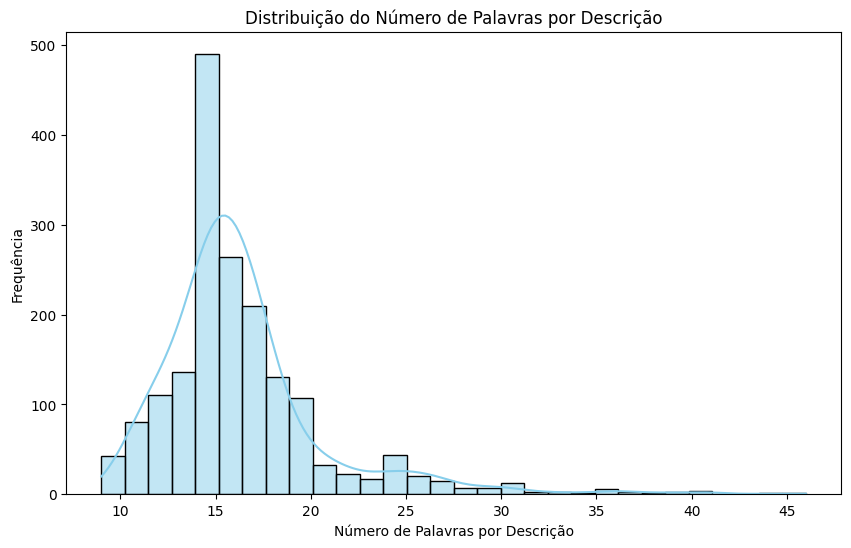

C:\Users\rbr_y\AppData\Local\Temp\ipykernel_18000\3878185961.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_df['Tipo'], y=stats_df['Valor'], palette="Blues_d")


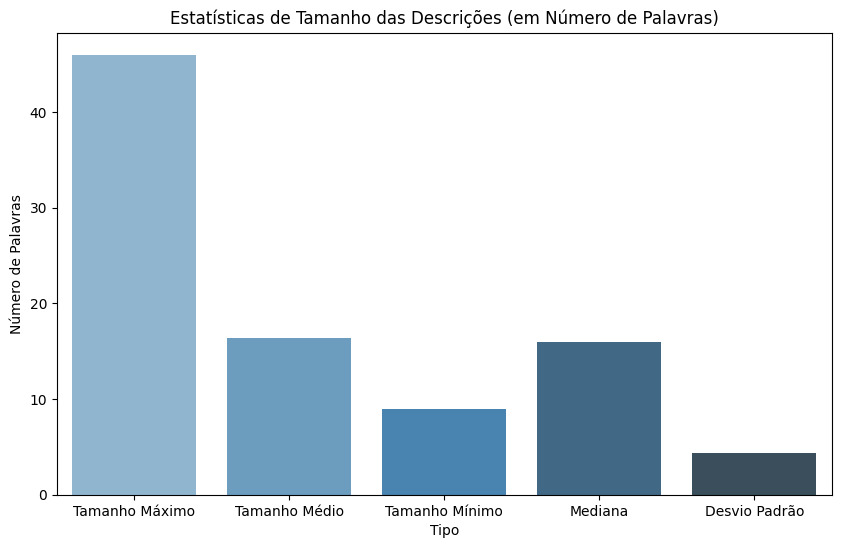

C:\Users\rbr_y\AppData\Local\Temp\ipykernel_18000\3878185961.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=procedure_frequencies_sorted.index, x=procedure_frequencies_sorted.values, palette="Blues_d")


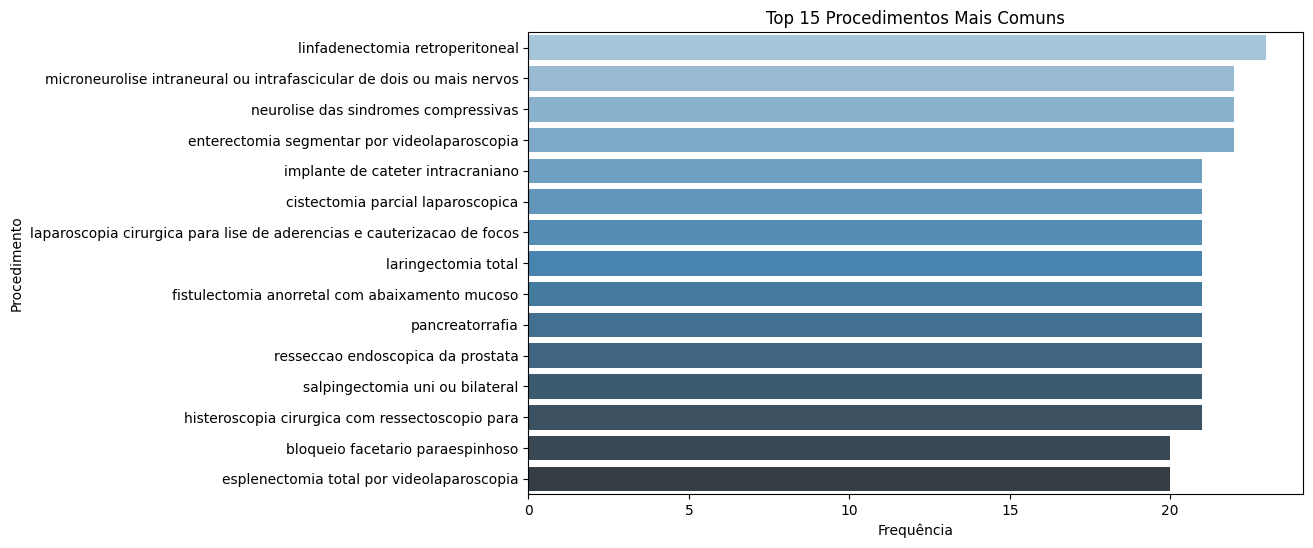

C:\Users\rbr_y\AppData\Local\Temp\ipykernel_18000\3878185961.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=procedures_per_tuss_sorted.index, x=procedures_per_tuss_sorted.values, palette="Purples_d")


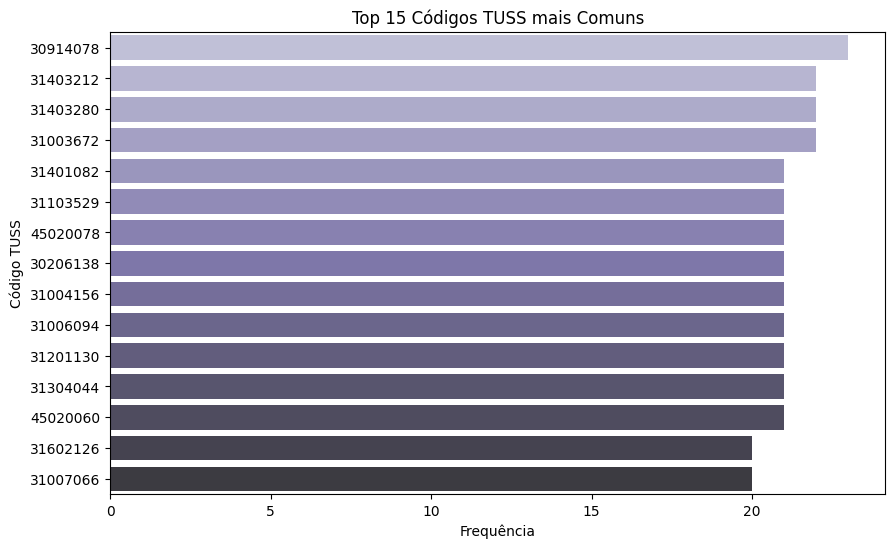

In [4]:
# Estatísticas de contagem de palavras por descrição
word_count_per_descricao = dataset['descricao'].apply(lambda x: len(x.split())).reset_index(name='word_count')
max_words_per_descricao = word_count_per_descricao['word_count'].max()
min_words_per_descricao = word_count_per_descricao['word_count'].min()
mean_words_per_descricao = word_count_per_descricao['word_count'].mean()
median_words_per_descricao = word_count_per_descricao['word_count'].median()
std_dev_words_per_descricao = word_count_per_descricao['word_count'].std()
word_count_distribution = word_count_per_descricao['word_count'].value_counts().reset_index(name='n').rename(columns={'index': 'word_count'})
unique_words_count = len(set(' '.join(dataset['descricao']).split()))

# Percentis para distribuição do número de palavras
percentiles = np.percentile(word_count_per_descricao['word_count'], [25, 50, 75])

# Contagem de procedimentos
procedimento_count = dataset['procedimento'].nunique()
procedures_per_tuss = dataset['tuss'].value_counts()
procedure_frequencies = dataset['procedimento'].value_counts()

# Estatísticas para o número de caracteres por descrição
char_count_per_descricao = dataset['descricao'].apply(len)
max_chars_per_descricao = char_count_per_descricao.max()
min_chars_per_descricao = char_count_per_descricao.min()


# Impressão das estatísticas
print(f"Contagem de Palavras Únicas: {unique_words_count}")
print(f"Quantidade de Procedimentos Únicos: {procedimento_count}")
print(f"Tamanho Máximo de Palavras por Descrição: {max_words_per_descricao}")
print(f"Tamanho Mínimo de Palavras por Descrição: {min_words_per_descricao}")
print(f"Tamanho Médio de Palavras por Descrição: {mean_words_per_descricao}")
print(f"Tamanho Mediano de Palavras por Descrição: {median_words_per_descricao}")
print(f"Desvio Padrão do Número de Palavras por Descrição: {std_dev_words_per_descricao}")
print(f"Percentil 25%: {percentiles[0]}, Percentil 50% (Mediana): {percentiles[1]}, Percentil 75%: {percentiles[2]}")

# Definindo stopwords
stop_words = set(stopwords.words('portuguese'))

# Função para contar stopwords em um texto
def count_stopwords(text):
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

# Adicionando contagem de stopwords ao dataset
dataset['stopword_count'] = dataset['descricao'].apply(count_stopwords)

# Calculando o total de palavras e a diversidade lexical
total_words = sum(word_count_per_descricao['word_count'])
diversidade_lexical = unique_words_count / total_words
print(f"Diversidade Lexical: {diversidade_lexical:.2f}")

# Calculando a proporção de stopwords
total_stopwords = dataset['stopword_count'].sum()
proporcao_stopwords = total_stopwords / total_words
print(f"Proporção de Stopwords: {proporcao_stopwords:.2%}")

# Calculando o número de frases e o tamanho médio de frases
dataset['frase_count'] = dataset['descricao'].apply(lambda x: len(x.split('.')))
mean_frase_length = total_words / dataset['frase_count'].sum()
print(f"Tamanho Médio de Frases: {mean_frase_length:.2f} palavras")

# Calculando densidade de palavras raras
term_frequencies = pd.Series(' '.join(dataset['descricao']).split()).value_counts()
rare_words = term_frequencies[term_frequencies == 1]
rare_words_density = len(rare_words) / unique_words_count
print(f"Densidade de Palavras Raras: {rare_words_density:.2%}")

# Contagem de palavras por procedimento
class_word_count = dataset.groupby('procedimento')['descricao'].apply(lambda x: x.str.split().str.len().mean())
print("\nProcedimentos com maior contagem de palavras (média):")
print(class_word_count.sort_values(ascending=False).head(10))

# Extração de bigramas
vectorizer_bi = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = vectorizer_bi.fit_transform(dataset['descricao'])
bigrams = vectorizer_bi.get_feature_names_out()
bigram_freq = bigram_matrix.sum(axis=0).tolist()[0]
bigram_df = pd.DataFrame({'bigram': bigrams, 'frequencia': bigram_freq})
bigram_df_sorted = bigram_df.sort_values(by='frequencia', ascending=False).head(15)

# Extração de trigramas
vectorizer_tri = CountVectorizer(ngram_range=(3, 3))
trigram_matrix = vectorizer_tri.fit_transform(dataset['descricao'])
trigrams = vectorizer_tri.get_feature_names_out()
trigram_freq = trigram_matrix.sum(axis=0).tolist()[0]
trigram_df = pd.DataFrame({'trigram': trigrams, 'frequencia': trigram_freq})
trigram_df_sorted = trigram_df.sort_values(by='frequencia', ascending=False).head(15)

# Exibindo os bigramas e trigramas mais frequentes
print("\nBigramas Mais Frequentes:")
print(bigram_df_sorted)

print("\nTrigramas Mais Frequentes:")
print(trigram_df_sorted)

# Visualização da Distribuição de Palavras por Descrição
plt.figure(figsize=(10, 6))
sns.histplot(word_count_per_descricao['word_count'], kde=True, color='skyblue', bins=30)
plt.title("Distribuição do Número de Palavras por Descrição")
plt.xlabel("Número de Palavras por Descrição")
plt.ylabel("Frequência")
plt.show()

# Estatísticas de Tamanho das Descrições
stats_df = pd.DataFrame({
    'Tipo': ["Tamanho Máximo", "Tamanho Médio", "Tamanho Mínimo", "Mediana", "Desvio Padrão"],
    'Valor': [max_words_per_descricao, mean_words_per_descricao, min_words_per_descricao, median_words_per_descricao, std_dev_words_per_descricao]
})

plt.figure(figsize=(10, 6))
sns.barplot(x=stats_df['Tipo'], y=stats_df['Valor'], palette="Blues_d")
plt.title("Estatísticas de Tamanho das Descrições (em Número de Palavras)")
plt.ylabel("Número de Palavras")
plt.show()

# Visualização da Distribuição de Procedimentos Mais Frequentes (Top 15)
procedure_frequencies_sorted = procedure_frequencies.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(y=procedure_frequencies_sorted.index, x=procedure_frequencies_sorted.values, palette="Blues_d")
plt.title("Top 15 Procedimentos Mais Comuns")
plt.xlabel("Frequência")
plt.ylabel("Procedimento")
plt.show()

# Contagem de Procedimentos por Código TUSS (Top 15)
plt.figure(figsize=(10, 6))
procedures_per_tuss_sorted = procedures_per_tuss.head(15)
sns.barplot(y=procedures_per_tuss_sorted.index, x=procedures_per_tuss_sorted.values, palette="Purples_d")
plt.title("Top 15 Códigos TUSS mais Comuns")
plt.xlabel("Frequência")
plt.ylabel("Código TUSS")
plt.show()


In [9]:
# Certifique-se que está usando a GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")


Usando dispositivo: cuda


# Configuração e Treinamento de Modelo BERT

Este módulo descreve a configuração, tokenização e treinamento de um modelo **BERT** para classificação de descrições cirúrgicas com base nos códigos **TUSS**.

 1. **Configurações do Modelo BERT**

Este módulo utiliza o modelo pré-treinado BERT para a tarefa de classificação de texto, com base em descrições cirúrgicas e códigos TUSS. O objetivo é treinar o modelo para identificar corretamente os códigos associados às descrições fornecidas.

**Configurações Iniciais**
- **Modelo BERT:** O modelo pré-treinado utilizado é o `bert-base-uncased`.
- **Tokenização:** As descrições são tokenizadas para serem processadas pelo modelo. A tokenização inclui:
  - Adição de tokens especiais (`[CLS]` e `[SEP]`);
  - Preenchimento (`padding`) para atingir o comprimento máximo configurado;
  - Truncamento de sequências muito longas.
- **Configuração do Comprimento Máximo da Sequência:** 128 tokens

```python
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
```

2. **Preparação dos Dados**

Uma função personalizada realiza a tokenização das descrições cirúrgicas, convertendo os textos em sequências de tokens adequadas para entrada no modelo BERT.

```python
def tokenize_descriptions(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
```

**Parâmetros:**

texts: Lista de textos para tokenizar.
tokenizer: Instância do tokenizer BERT.
max_length: Comprimento máximo permitido para as sequências (padrão: 128).
**Saída**: Tensores contendo os tokens (input_ids) e máscaras de atenção (attention_mask).

- **Tokenização do Dataset:** As descrições são tokenizadas usando a função definida acima.
- **Codificação dos Rótulos:** Os códigos TUSS são convertidos para valores numéricos usando o `LabelEncoder`. O número de classes também é calculado.
- **Divisão em Conjuntos de Treinamento e Validação:** Utilizando train_test_split, os dados são divididos de forma estratificada para garantir representatividade.


```python 
MAX_SEQUENCE_LENGTH = 128
tokenized_train = tokenize_descriptions(dataset['descricao'], tokenizer, max_length=MAX_SEQUENCE_LENGTH)

# Codificação dos rótulos
y = dataset['tuss']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Divisão dos dados
indices = list(range(len(dataset)))
X_train_indices, X_val_indices, y_train, y_val = train_test_split(
    indices, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

```

3. **Criação do Dataset Personalizado**

Para facilitar o uso com o PyTorch, criamos um dataset personalizado que inclui:

- IDs de entrada (`input_ids`);
- Máscaras de atenção (`attention_mask`);
- Rótulos (`labels`);

```python
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels, descriptions=None):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels
        self.descriptions = descriptions

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }
        if self.descriptions is not None:
            item['descricao'] = self.descriptions[idx]
        return item

```

4. **Configuração do Modelo e Otimizador**

- Modelo Pré-treinado: Utilizamos o `'BertForSequenceClassification'` com o número de classes ajustado para os rótulos do dataset.
- Otimizador: Utilizamos `AdamW` com uma taxa de aprendizado inicial de `2e-5`.

```python
bert_model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=num_classes)
bert_model.to(device)

optimizer = torch.optim.AdamW(bert_model.parameters(), lr=2e-5)

```
5. **Funções de Métricas e Treinamentos**

As métricas calculadas incluem:

- Acurácia;
- F1-Score ponderado;
- Recall ponderado.
O processo de treinamento é organizado em épocas, com monitoramento das métricas para o conjunto de treinamento e validação.

```python
# Função para calcular métricas
def compute_metrics(labels, preds):
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    return acc, f1, recall

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(model, train_loader, val_loader, optimizer, epochs=10):
    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        
        # Treinamento
        model.train()
        total_loss = 0
        all_train_labels = []
        all_train_preds = []
        
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            preds = outputs.logits.argmax(dim=-1)
            all_train_labels.extend(labels.cpu().numpy())
            all_train_preds.extend(preds.cpu().numpy())

        avg_train_loss = total_loss / len(train_loader)
        train_acc, train_f1, train_recall = compute_metrics(all_train_labels, all_train_preds)
        
        print(f'Treino - Loss: {avg_train_loss:.4f} | Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}, Recall: {train_recall:.4f}')

        # Avaliação
        model.eval()
        total_val_loss = 0
        all_val_labels = []
        all_val_preds = []
        
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_val_loss += loss.item()

                preds = outputs.logits.argmax(dim=-1)
                all_val_labels.extend(labels.cpu().numpy())
                all_val_preds.extend(preds.cpu().numpy())

        avg_val_loss = total_val_loss / len(val_loader)
        val_acc, val_f1, val_recall = compute_metrics(all_val_labels, all_val_preds)
        
        print(f'Validação - Loss: {avg_val_loss:.4f} | Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}, Recall: {val_recall:.4f}')
```


6. **Configuração do DataLoader e Execução do Treinamento**

- **Batch Size:** 16 exemplos por batch.
- **Número de Épocas:** 10.

```python
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Treinar e avaliar o modelo
train_and_evaluate_model(bert_model, train_loader, val_loader, optimizer, epochs=10)
```


In [10]:
# Configurações do modelo BERT
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# Função para tokenizar o texto
def tokenize_descriptions(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

# Tokenizar descrições cirúrgicas
MAX_SEQUENCE_LENGTH = 128
tokenized_train = tokenize_descriptions(dataset['descricao'], tokenizer, max_length=MAX_SEQUENCE_LENGTH)

# Labels (códigos TUSS do dataset)
y = dataset['tuss']

# Codificação dos rótulos (códigos TUSS)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Dividir dados em treino e validação (agora com índices)
indices = list(range(len(dataset)))
X_train_indices, X_val_indices, y_train, y_val = train_test_split(
    indices, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded  # Adiciona estratificação
)

# Criar tensores de entrada e máscara de atenção usando os índices
input_ids = tokenized_train['input_ids']
attention_masks = tokenized_train['attention_mask']

X_train = input_ids[X_train_indices]
mask_train = attention_masks[X_train_indices]

X_val = input_ids[X_val_indices]
mask_val = attention_masks[X_val_indices]

# Criar um Dataset Personalizado
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels, descriptions=None):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels
        self.descriptions = descriptions

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }
        if self.descriptions is not None:
            item['descricao'] = self.descriptions[idx]
        return item

# Criar datasets para PyTorch usando o dataset personalizado
train_dataset = CustomDataset(X_train, mask_train, torch.tensor(y_train, dtype=torch.long), dataset['descricao'].iloc[X_train_indices].tolist())
val_dataset = CustomDataset(X_val, mask_val, torch.tensor(y_val, dtype=torch.long), dataset['descricao'].iloc[X_val_indices].tolist())

# Configurar o modelo BERT para classificação
bert_model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=num_classes)
bert_model.to(device)

# Inicializando o histórico para armazenar as métricas
history = {
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': [],
    'train_f1': [],
    'val_f1': [],
    'train_recall': [],
    'val_recall': []
}

# Função de métricas personalizada
def compute_metrics(labels, preds):
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    return acc, f1, recall

# Função para treinar e validar o modelo
def train_and_evaluate_model(model, train_loader, val_loader, optimizer, epochs=10):
    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        
        # Treinamento
        model.train()
        total_loss = 0
        all_train_labels = []
        all_train_preds = []
        
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()  # Limpar os gradientes
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()  # Calcular os gradientes
            optimizer.step()  # Atualizar os pesos
            
            total_loss += loss.item()
            preds = outputs.logits.argmax(dim=-1)
            all_train_labels.extend(labels.cpu().numpy())
            all_train_preds.extend(preds.cpu().numpy())

        avg_train_loss = total_loss / len(train_loader)
        train_acc, train_f1, train_recall = compute_metrics(all_train_labels, all_train_preds)
        
        history['train_loss'].append(avg_train_loss)
        history['train_accuracy'].append(train_acc)
        history['train_f1'].append(train_f1)
        history['train_recall'].append(train_recall)
        
        print(f'Treino - Loss: {avg_train_loss:.4f} | Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}, Recall: {train_recall:.4f}')

        # Avaliação
        model.eval()
        total_val_loss = 0
        all_val_labels = []
        all_val_preds = []
        
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_val_loss += loss.item()

                preds = outputs.logits.argmax(dim=-1)
                all_val_labels.extend(labels.cpu().numpy())
                all_val_preds.extend(preds.cpu().numpy())

        avg_val_loss = total_val_loss / len(val_loader)
        val_acc, val_f1, val_recall = compute_metrics(all_val_labels, all_val_preds)
        
        history['val_loss'].append(avg_val_loss)
        history['val_accuracy'].append(val_acc)
        history['val_f1'].append(val_f1)
        history['val_recall'].append(val_recall)
        
        print(f'Validação - Loss: {avg_val_loss:.4f} | Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}, Recall: {val_recall:.4f}')

# Criar DataLoader para os datasets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Definir o otimizador
optimizer = torch.optim.AdamW(bert_model.parameters(), lr=2e-5)

# Treinar e avaliar o modelo
train_and_evaluate_model(bert_model, train_loader, val_loader, optimizer, epochs=10)

# Salvar o histórico das métricas em uma planilha CSV
# Salvar na pasta E:\Projeto MBA\projeto_mba\resultados
output_path = r'E:/Projeto MBA/projeto_mba/resultados/metrics_history.csv'
df_history = pd.DataFrame(history)
df_history.to_csv(output_path, index=False)
print("Histórico de métricas salvo em:", output_path)

c:\Users\rbr_y\AppData\Local\Programs\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\rbr_y\AppData\Local\Programs\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationsh

Epoch 1/10
Treino - Loss: 4.4966 | Accuracy: 0.0141, F1: 0.0069, Recall: 0.0141
Validação - Loss: 4.3490 | Accuracy: 0.0367, F1: 0.0184, Recall: 0.0367
Epoch 2/10
Treino - Loss: 4.1092 | Accuracy: 0.1025, F1: 0.0873, Recall: 0.1025
Validação - Loss: 3.7396 | Accuracy: 0.3814, F1: 0.3172, Recall: 0.3814
Epoch 3/10
Treino - Loss: 3.4990 | Accuracy: 0.4975, F1: 0.4820, Recall: 0.4975
Validação - Loss: 3.0447 | Accuracy: 0.7966, F1: 0.7694, Recall: 0.7966
Epoch 4/10
Treino - Loss: 2.8457 | Accuracy: 0.8403, F1: 0.8335, Recall: 0.8403
Validação - Loss: 2.4121 | Accuracy: 0.9124, F1: 0.9064, Recall: 0.9124
Epoch 5/10
Treino - Loss: 2.2560 | Accuracy: 0.9484, F1: 0.9465, Recall: 0.9484
Validação - Loss: 1.8105 | Accuracy: 0.9746, F1: 0.9720, Recall: 0.9746
Epoch 6/10
Treino - Loss: 1.7604 | Accuracy: 0.9845, F1: 0.9842, Recall: 0.9845
Validação - Loss: 1.3555 | Accuracy: 0.9887, F1: 0.9873, Recall: 0.9887
Epoch 7/10
Treino - Loss: 1.3501 | Accuracy: 0.9894, F1: 0.9890, Recall: 0.9894
Validaçã

In [11]:
# Diretório onde o modelo e o tokenizador serão salvos
save_directory = "bert_model_1.3"

# Salvar o modelo e o tokenizador no mesmo diretório
bert_model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)



('bert_model_1.3\\tokenizer_config.json',
 'bert_model_1.3\\special_tokens_map.json',
 'bert_model_1.3\\vocab.txt',
 'bert_model_1.3\\added_tokens.json')

In [12]:
from transformers import BertForSequenceClassification, BertTokenizer

# Caminho para o diretório onde o modelo e o tokenizador foram salvos
model_path = "bert_model_1.3"

# Carregar o modelo e o tokenizador
bert_model = BertForSequenceClassification.from_pretrained(model_path, num_labels=num_classes)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Mover o modelo para o dispositivo adequado (CPU ou GPU)
bert_model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Geração de Grafo do Modelo BERT

Nesta seção, geramos um grafo que representa o fluxo de dados e operações realizadas pelo modelo BERT ao processar um batch de entrada. Este grafo é útil para visualização e análise das camadas do modelo.

### Código para Geração do Grafo

1. **Obtenção de um Batch de Entrada**:
    O primeiro batch de dados é extraído do `DataLoader` de treino.

    ```python
    batch = next(iter(train_loader))
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    ```

2. **Passada de Forward pelo Modelo**:
    Os dados do batch são passados pelo modelo para realizar a previsão, gerando a saída correspondente.

    ```python
    output = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
    ```

3. **Geração do Grafo**:
    Utilizamos a função `make_dot` para criar um grafo do modelo. Este grafo é renderizado em formato PNG e salvo como arquivo.

    ```python
    make_dot(output.logits, params=dict(bert_model.named_parameters())).render("BERT_1.3", format="png")
    ```

4. **Visualização do Modelo**:
    O modelo BERT configurado também pode ser exibido diretamente para análise de sua arquitetura.

    ```python
    print(bert_model)
    ```

---

### Dependências Necessárias

Certifique-se de que as seguintes bibliotecas estão instaladas no ambiente:
- `torchviz`: Necessária para a função `make_dot`. Pode ser instalada via `pip install torchviz`.

---

### Arquivo Gerado

- **Nome**: `BERT_1.3.png`
- **Formato**: PNG
- **Conteúdo**: Representação gráfica do modelo BERT, exibindo as conexões entre as camadas e os parâmetros treináveis.

---

### Observações

- O grafo gerado é baseado em um único batch de entrada e reflete o comportamento do modelo durante o treinamento.
- Alterações no modelo ou no batch de entrada podem modificar a estrutura do grafo.


In [13]:
import torch
from torchviz import make_dot

# Certifique-se de que o modelo está no dispositivo correto
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Obtenha um batch de entrada do train_loader
batch = next(iter(train_loader))

# Mova os dados do batch para o mesmo dispositivo do modelo
input_ids = batch['input_ids'].to(device)
attention_mask = batch['attention_mask'].to(device)
labels = batch['labels'].to(device)

# Realize uma passada forward para gerar o grafo computacional
output = bert_model(input_ids, attention_mask=attention_mask, labels=labels)

# Gere o grafo a partir da saída do modelo
make_dot(output.logits, params=dict(bert_model.named_parameters())).render("BERT_1.3", format="png")

# Exiba a arquitetura do modelo
print(bert_model)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.951671 to fit


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Função para Visualização de Métricas

A função `plot_metrics` foi criada para exibir gráficos que mostram a evolução das métricas ao longo das épocas de treinamento. Esses gráficos ajudam a avaliar o desempenho do modelo durante o treinamento e validação.

---

- **Parâmetros:**

    - `history`: Dicionário que armazena as métricas calculadas durante o treinamento e validação. Deve conter as chaves:
        - `'train_loss'` e `'val_loss'`: Perda (loss) durante o treino e validação.
        - `'train_accuracy'` e `'val_accuracy'`: Acurácia durante o treino e validação.
        - `'train_f1'` e `'val_f1'`: F1 Score durante o treino e validação.
        - `'train_recall'` e `'val_recall'`: Recall durante o treino e validação.

- **Gráficos Gerados:**

- Loss (Perda):
Exibe a curva de perda para treino e validação.
- Accuracy (Acurácia):
Mostra a evolução da acurácia em treino e validação.
- F1 Score:
Gráfico comparativo do F1 Score para treino e validação.
- Recall:
Curva do recall para treino e validação.


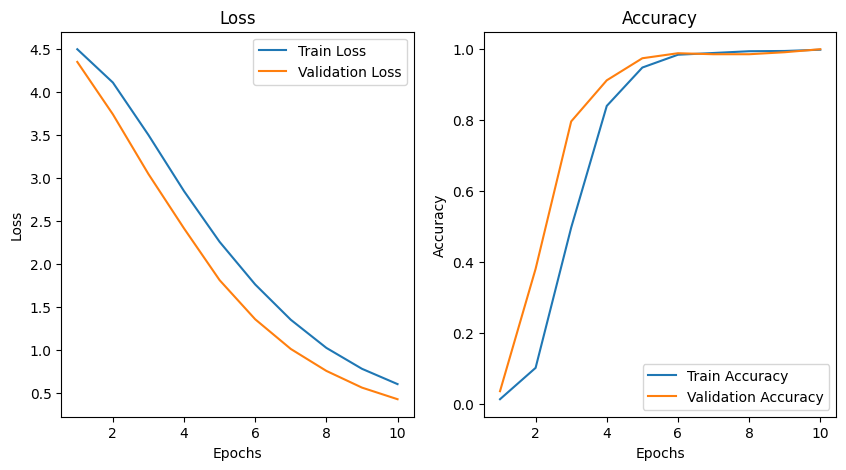

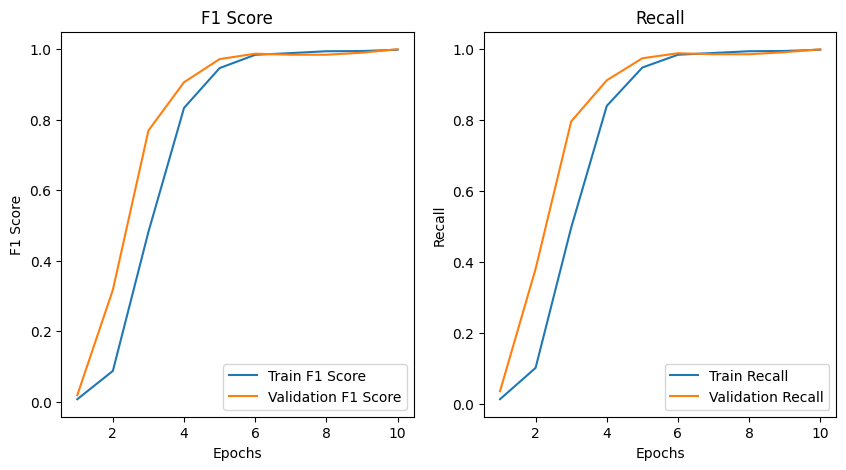

In [14]:
    # Função para plotar os gráficos
    def plot_metrics(history):
        epochs = range(1, len(history['train_loss']) + 1)

        # Loss
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, history['train_loss'], label='Train Loss')
        plt.plot(epochs, history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, history['train_accuracy'], label='Train Accuracy')
        plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.show()

        # F1 and Recall
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, history['train_f1'], label='Train F1 Score')
        plt.plot(epochs, history['val_f1'], label='Validation F1 Score')
        plt.title('F1 Score')
        plt.xlabel('Epochs')
        plt.ylabel('F1 Score')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, history['train_recall'], label='Train Recall')
        plt.plot(epochs, history['val_recall'], label='Validation Recall')
        plt.title('Recall')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.legend()
        
        plt.show()

    # Plotar as métricas após o treinamento
    plot_metrics(history)

## Avaliação do Modelo no Conjunto de Validação

A função `evaluate_model_with_examples` é responsável por avaliar o desempenho do modelo BERT no conjunto de validação, exibindo um relatório de classificação e exemplos de previsões com suas descrições associadas.

---

### Descrição da Função

**Parâmetros:**

- `model`: O modelo treinado a ser avaliado (no caso, o modelo BERT).
- `val_loader`: O DataLoader do conjunto de validação que contém os dados para avaliação.
- `num_examples`: O número de exemplos aleatórios a serem exibidos após a avaliação (valor padrão é 5).

**Etapas:**
1. **Modo de Avaliação:**

- Coloca o modelo em modo de avaliação `(model.eval())`, desativando a atualização de gradientes e a regularização de dropout.

2. **Previsões e Rótulos:**

- A função faz uma passada pelo conjunto de validação, obtendo as previsões do modelo e salvando as descrições, rótulos reais e previsões.
- As predições são decodificadas de volta para os rótulos originais usando o label_encoder.

3. **Relatório de Classificação:**

- A função gera e exibe um relatório de classificação com métricas como precisão, recall e F1 score usando a função `classification_report` do `sklearn`.

4. **Exibição de Exemplos Aleatórios:**

- Exibe exemplos de previsões, mostrando a descrição da amostra, o rótulo real e o rótulo previsto, selecionando um número aleatório de exemplos (definido por `num_examples`).

5. **Retorno:**

- Retorna as predições (`all_val_preds`), os rótulos reais (`all_val_labels`) e as descrições (`all_val_descriptions`).
---


### Observações

- O parâmetro num_examples define quantos exemplos de previsão serão exibidos após a avaliação.
- Se o conjunto de validação não incluir a chave 'descricao', a função não exibirá as descrições.
- O modelo deve estar em modo de avaliação para garantir que as previsões sejam feitas sem atualizar os pesos do modelo.

In [15]:

# Definir o dispositivo (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carregar o modelo e o tokenizador
model_path = "bert_model_1.3"
bert_model = BertForSequenceClassification.from_pretrained(model_path, num_labels=num_classes)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Mover o modelo para o dispositivo
bert_model.to(device)


# Avaliar o modelo no conjunto de validação
def evaluate_model_with_examples(model, val_loader, num_examples=5):
    model.eval()  # Colocar o modelo em modo de avaliação
    all_val_preds = []
    all_val_labels = []
    all_val_descriptions = []
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            # Obter os logits das predições
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = outputs.logits.argmax(dim=-1)
            
            # Salvar predições, rótulos reais e descrições
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())
            if 'descricao' in batch:
                all_val_descriptions.extend(batch['descricao'])

    # Decodificar os rótulos preditos e reais
    val_preds_decoded = label_encoder.inverse_transform(all_val_preds)
    val_labels_decoded = label_encoder.inverse_transform(all_val_labels)

    # Exibir o relatório de classificação
    print(classification_report(val_labels_decoded, val_preds_decoded))
    
    # Selecionar amostras aleatórias para exibição
    if all_val_descriptions:  # Certificar-se de que as descrições foram fornecidas
        print("\nExemplos de previsões (descrição, TUSS real, TUSS previsto):")
        sample_indices = random.sample(range(len(all_val_descriptions)), min(num_examples, len(all_val_descriptions)))
        for idx in sample_indices:
            print(f"Descrição: {all_val_descriptions[idx]}")
            print(f"  TUSS real: {val_labels_decoded[idx]}")
            print(f"  TUSS previsto: {val_preds_decoded[idx]}")
            print("-" * 60)

    # Retornar as predições, rótulos reais e descrições
    return all_val_preds, all_val_labels, all_val_descriptions

# Avaliar o modelo no conjunto de validação
val_preds, val_labels, val_descriptions = evaluate_model_with_examples(bert_model, val_loader, num_examples=5)


# Criar DataFrame para salvar os dados das predições do conjunto de validação
data_val = {
    'Descricao': val_descriptions,
    'TUSS_Real': label_encoder.inverse_transform(val_labels),
    'TUSS_Previsto': label_encoder.inverse_transform(val_preds)
}

df_val = pd.DataFrame(data_val)

# Definir o caminho para salvar o arquivo Excel
excel_path = r'E:/Projeto MBA/projeto_mba/resultados/val_predictions.xlsx'
df_val.to_excel(excel_path, index=False)
print("Predições salvas no arquivo:", excel_path)



              precision    recall  f1-score   support

    30101255       1.00      1.00      1.00         4
    30101298       1.00      1.00      1.00         4
    30101468       1.00      0.25      0.40         4
    30101492       0.57      1.00      0.73         4
    30101522       0.80      1.00      0.89         4
    30101620       1.00      1.00      1.00         4
    30101930       1.00      1.00      1.00         4
    30201080       1.00      1.00      1.00         4
    30205042       1.00      1.00      1.00         4
    30205050       1.00      1.00      1.00         4
    30205069       1.00      1.00      1.00         4
    30206138       1.00      1.00      1.00         4
    30208017       1.00      1.00      1.00         4
    30208025       1.00      1.00      1.00         4
    30208033       1.00      1.00      1.00         4
    30301050       1.00      1.00      1.00         4
    30501067       1.00      1.00      1.00         4
    30502209       1.00    

## Exemplo de Predição para Novos Dados

Esta seção descreve como fazer previsões para novos exemplos (descrições cirúrgicas) utilizando o modelo BERT treinado.

---
### Descrição do Processo

1. **Tokenização dos Novos Dados:**

- O texto das novas descrições é tokenizado usando o `tokenizer` do modelo BERT.
- A tokenização inclui a adição de tokens especiais, o padding para garantir que todas as sequências tenham o mesmo comprimento e a truncagem para não ultrapassar o limite de tokens especificado (`max_length=128`).

A função `tokenizer` retorna tensores no formato necessário para a entrada do modelo.

2. **Envio para o Dispositivo de Processamento:**

- Os tensores resultantes da tokenização são enviados para o dispositivo de processamento (CPU ou GPU) usando o método `.to(device).`

3. **Realizando a Predição:**

- A predição é realizada utilizando o método `bert_model`, que recebe os dados tokenizados como entrada.
- O modelo gera os logits, e a classe predita é obtida ao aplicar `torch.argmax` nos logits, selecionando a classe com a maior pontuação.

4. **Decodificação da Classe Prevista:**

- O índice da classe predita é convertido para o rótulo real (código TUSS) utilizando o `label_encoder.inverse_transform.`
- O rótulo real é então impresso como a predição para a descrição cirúrgica fornecida.
---

### Exemplo de Uso

Você pode utilizar este código para fazer previsões para novas descrições que não estavam presentes no conjunto de treinamento. Por exemplo:

```python

new_descriptions = ["Exérese de lesão dérmica localizada no braço direito..."]
```

O modelo irá prever a classe associada a essa descrição com base no treinamento anterior.

---



In [16]:

# Carregar os novos dados (descrições cirúrgicas)
new_data_path = "E:/Projeto MBA/dataset/predicao.xlsx"
new_data = pd.read_excel(new_data_path)

def ler_planilha(sheet_name):
    # Lê o arquivo Excel e armazena em um DataFrame
    new_data = pd.read_excel(new_data_path, sheet_name=sheet_name)
    
    # Renomeia a coluna 'descricao' e converte para string
    new_data.columns = ['descricao'] 
    new_data['descricao'] = new_data['descricao'].astype(str)
    
    # Divide a coluna 'descricao' em três colunas: 'procedimento', 'tuss' e 'descricao'
    new_data[['procedimento', 'tuss', 'descricao']] = new_data['descricao'].str.split(',', n=2, expand=True)
    
    # Converte as colunas para string
    new_data['procedimento'] = new_data['procedimento'].astype(str)
    new_data['tuss'] = new_data['tuss'].astype(str)
    new_data['descricao'] = new_data['descricao'].astype(str)
    
    # Retorna um DataFrame com as colunas relevantes
    return new_data[['procedimento', 'tuss', 'descricao']]
# Lê os dados da planilha especificada
new_data = ler_planilha('desc_predic')
# Função para tokenizar novas descrições
def tokenize_new_descriptions(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

# Tokenizar as novas descrições
new_tokenized = tokenize_new_descriptions(new_data['descricao'], tokenizer, max_length=MAX_SEQUENCE_LENGTH)

# Fazer predições para os novos dados
def predict_new_data(model, new_data, tokenizer, device):
    model.eval()  # Coloca o modelo em modo de avaliação
    input_ids = new_data['input_ids'].to(device)
    attention_mask = new_data['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = logits.argmax(dim=-1).cpu().numpy()

    # Decodificar os rótulos preditos
    predicted_labels = label_encoder.inverse_transform(preds)
    return predicted_labels

# Realizar predições para as novas descrições
predictions = predict_new_data(bert_model, new_tokenized, tokenizer, device)

# Adicionar as predições ao DataFrame original
new_data['predicted_tuss'] = predictions

# Exibir as primeiras predições
print(new_data[['descricao', 'predicted_tuss']].head())

# Salvar as predições em um novo arquivo
new_data.to_excel("E:/Projeto MBA/projeto_mba/resultados/predicoes_realizadas.xlsx", index=False)


                                           descricao predicted_tuss
0  "Procedimento de denervação percutânea em múlt...       31404034
1  "Denervação percutânea guiada por imagem da fa...       31404034
2  "Realização de denervação percutânea da faceta...       31404034
3  "Procedimento de denervação percutânea da face...       31404034
4  "Realização de punção articular no joelho para...       30713137


In [17]:
# Exemplo de predição para novos dados
new_descriptions = ["While I study english my cousin was trying to make wine with his friend"]
tokenized_new_data = tokenizer(
    new_descriptions,
    add_special_tokens=True,
    max_length=128,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Mover os tensores para a mesma unidade de processamento do modelo (GPU)
tokenized_new_data = {key: value.to(device) for key, value in tokenized_new_data.items()}


# Fazer a predição para o novo exemplo
with torch.no_grad():
    output = bert_model(**tokenized_new_data)
    logits_new = output.logits
    predicted_class = torch.argmax(logits_new, axis=1)

# Traduzir o índice da classe prevista para o rótulo real (TUSS)
predicted_label = label_encoder.inverse_transform(predicted_class.cpu().numpy())
print(f"Predição para nova descrição: {predicted_label[0]}")



Predição para nova descrição: 30101930
